In [1]:
import pandas as pd
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()
# nltk.download('stopwords')

In [2]:
#Get the preprocessed file
df = pd.read_csv("preprocessed_nto_to.csv")

#Additional preprocessing:
df = df.drop(columns = ['created_utc','local_time_year', 'local_time_minute','local_time_second'])
#Removing extra space in title, post body and author. 
df.title = df.title.replace('\s+', ' ', regex=True)
df.post_body = df.post_body.replace('\s+', ' ', regex=True)
df.author = df.author.replace('\s+', ' ', regex=True)

### Language Detection 

In [3]:
import langdetect 
from nltk.corpus import stopwords
stop = stopwords.words('english')

#Select all records that have post body in English
df['lang'] = df["post_body"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
df = df[df["lang"]=="en"]
df = df.drop(columns = ['lang'])

##Select all records that have title in English
df['lang'] = df["title"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
df = df[df["lang"]=="en"]
df = df.drop(columns = ['lang'])

#dataframe with title and post body in English.
df.head()

,title,post_body,author,num_comments,score,label,local_time_month,local_time_day,local_time_hour
0,parents forced to explain thrill of having sex...,san diego instructing their confused year old ...,kremor,0,1,1,2,20,19
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2,19,9
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news tha...,sanlear,0,1,1,2,19,6
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2,18,14
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cust...,heavylobster,0,1,1,2,17,20


### Tokenization of post body and title to calculate word count, character count and average word length.

In [4]:
import nltk
#tokenize post body
df['tokenized_post_body'] = df.apply(lambda row: nltk.word_tokenize(row['post_body']), axis=1)
#Word count of tokenized post body
df['word_count_body'] = df["tokenized_post_body"].apply(lambda x: len(str(x).split(" ")))
#Character count of post body
df['char_count_body'] = df["tokenized_post_body"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
#Find average word length of post body
df['avg_word_length_body'] = df['char_count_body'] / df['word_count_body']

#tokenize title
df['tokenized_title'] = df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
#Word count of tokenized title
df['word_count_title'] = df["tokenized_title"].apply(lambda x: len(str(x).split(" ")))
#Character count of title
df['char_count_title'] = df["tokenized_title"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
#Find average word length of title
df['avg_word_length_title'] = df['char_count_title'] / df['word_count_title']

#remove redundant columns
df = df.drop(['tokenized_post_body', 'tokenized_title'], axis=1)

df.head()

,title,post_body,author,num_comments,score,label,local_time_month,local_time_day,local_time_hour,word_count_body,char_count_body,avg_word_length_body,word_count_title,char_count_title,avg_word_length_title
0,parents forced to explain thrill of having sex...,san diego instructing their confused year old ...,kremor,0,1,1,2,20,19,217,1633,7.525346,17,134,7.882353
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2,19,9,11,93,8.454545,11,93,8.454545
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news tha...,sanlear,0,1,1,2,19,6,246,1808,7.349593,14,112,8.000000
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2,18,14,9,64,7.111111,9,64,7.111111
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cust...,heavylobster,0,1,1,2,17,20,155,1245,8.032258,8,63,7.875000


### Lemmatization

In [5]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

#Remove stop words from post body
df['post_body_no_stop_words'] = df['post_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#tokenize post body with no stop words.
df['tokenized_post_body_no_stopwords'] = df.apply(lambda row: nltk.word_tokenize(row['post_body_no_stop_words']), axis=1)
#Lemmatization of tokenized post body
df['lemmatized_post_body'] = df['tokenized_post_body_no_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

#remove stop words from title
df['title_no_stopwords'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#tokenize title with no stop words.
df['tokenized_title_no_stopwords'] = df.apply(lambda row: nltk.word_tokenize(row['title_no_stopwords']), axis=1)
#Lemmatization of tokenized title
df['lemmatized_title'] = df['tokenized_title_no_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

#Remove redundant columns
df = df.drop(['post_body_no_stop_words','tokenized_post_body_no_stopwords','title_no_stopwords','tokenized_title_no_stopwords'], axis=1)
df.head()


,title,post_body,author,num_comments,score,label,local_time_month,local_time_day,local_time_hour,word_count_body,char_count_body,avg_word_length_body,word_count_title,char_count_title,avg_word_length_title,lemmatized_post_body,lemmatized_title
0,parents forced to explain thrill of having sex...,san diego instructing their confused year old ...,kremor,0,1,1,2,20,19,217,1633,7.525346,17,134,7.882353,"[san, diego, instructing, confused, year, old,...","[parent, forced, explain, thrill, sex, public,..."
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2,19,9,11,93,8.454545,11,93,8.454545,"[posh, restaurant, cucumber, slice, floating, ...","[posh, restaurant, cucumber, slice, floating, ..."
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news tha...,sanlear,0,1,1,2,19,6,246,1808,7.349593,14,112,8.000000,"[wolf, creek, al, reacting, dismay, news, belo...","[painted, rocksnail, know, really, fucked, ani..."
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2,18,14,9,64,7.111111,9,64,7.111111,"[onion, gotten, much, worse, recen]","[onion, gotten, much, worse, recen]"
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cust...,heavylobster,0,1,1,2,17,20,155,1245,8.032258,8,63,7.875000,"[sarasota, fl, statement, confirmed, customer,...","[boar, head, unveils, new, funfetti, birthday,..."


In [6]:
#Frequency encoding of author code.
#Note: This will not work when new categories(new authors) are added in the dataset.
#For example while testing with Worldnews dataset.
fe = df.groupby('author').size()
df.loc[:, 'author_code'] = df ['author'].map(fe)

#Remove author after encoding
df = df.drop('author', axis=1)

df.shape
df.head()

,title,post_body,num_comments,score,label,local_time_month,local_time_day,local_time_hour,word_count_body,char_count_body,avg_word_length_body,word_count_title,char_count_title,avg_word_length_title,lemmatized_post_body,lemmatized_title,author_code
0,parents forced to explain thrill of having sex...,san diego instructing their confused year old ...,0,1,1,2,20,19,217,1633,7.525346,17,134,7.882353,"[san, diego, instructing, confused, year, old,...","[parent, forced, explain, thrill, sex, public,...",24
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,0,1,1,2,19,9,11,93,8.454545,11,93,8.454545,"[posh, restaurant, cucumber, slice, floating, ...","[posh, restaurant, cucumber, slice, floating, ...",57
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news tha...,0,1,1,2,19,6,246,1808,7.349593,14,112,8.000000,"[wolf, creek, al, reacting, dismay, news, belo...","[painted, rocksnail, know, really, fucked, ani...",675
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,1,1,1,2,18,14,9,64,7.111111,9,64,7.111111,"[onion, gotten, much, worse, recen]","[onion, gotten, much, worse, recen]",1
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cust...,0,1,1,2,17,20,155,1245,8.032258,8,63,7.875000,"[sarasota, fl, statement, confirmed, customer,...","[boar, head, unveils, new, funfetti, birthday,...",12


### Check the variance inflation factor.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create data frame to check the vif
model_df = df.drop(['title', 'post_body', 'lemmatized_post_body', 'lemmatized_title'], axis=1)
#Model_df has all the numeric attributes.

vif_data = pd.DataFrame()
vif_data["feature"] = model_df.columns
vif_data["VIF"] = [variance_inflation_factor(model_df.values, i) 
for i in range(len(model_df.columns))]
vif_data

,feature,VIF
0,num_comments,1.068253
1,score,1.071929
2,label,2.943693
3,local_time_month,3.192477
4,local_time_day,3.985295
5,local_time_hour,6.162348
6,word_count_body,543.693306
7,char_count_body,537.447867
8,avg_word_length_body,312.805837
9,word_count_title,372.579390


In [11]:
#Remove some attributes that has high vif 
model_df = model_df.drop(['word_count_body', 'char_count_body', 'char_count_title', 'avg_word_length_title'], axis=1)

#Try vif again to see if there is any change.
vif_data = pd.DataFrame()
vif_data["feature"] = model_df.columns
vif_data["VIF"] = [variance_inflation_factor(model_df.values, i) 
for i in range(len(model_df.columns))]
vif_data


,feature,VIF
0,num_comments,1.068055
1,score,1.071784
2,label,2.730206
3,local_time_month,3.177686
4,local_time_day,3.959976
5,local_time_hour,6.126918
6,avg_word_length_body,16.655260
7,word_count_title,6.916865
8,author_code,1.923305


In [12]:
#Remove the body length attributes that has high vif 
model_df = model_df.drop('avg_word_length_body', axis=1)

#Try vif again to see if there is any change.
vif_data = pd.DataFrame()
vif_data["feature"] = model_df.columns
vif_data["VIF"] = [variance_inflation_factor(model_df.values, i) 
for i in range(len(model_df.columns))]
vif_data

,feature,VIF
0,num_comments,1.067997
1,score,1.071665
2,label,2.629598
3,local_time_month,2.854348
4,local_time_day,3.346751
5,local_time_hour,4.529389
6,word_count_title,4.759835
7,author_code,1.918307


<AxesSubplot:>

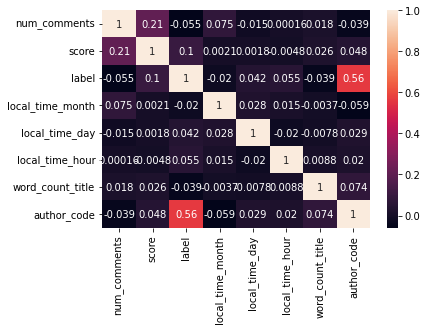

In [13]:
#Check the correlation
corr = model_df.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

In [14]:
#From the correlation plot, author code is highly correlated to the label.
#Remove the redundant attributes from the main dataframe.

df = df.drop(['title', 'post_body',
              'word_count_body', 'char_count_body','avg_word_length_body',
              'char_count_title', 'avg_word_length_title',  ], axis=1)
df.shape
df.head()


,num_comments,score,label,local_time_month,local_time_day,local_time_hour,word_count_title,lemmatized_post_body,lemmatized_title,author_code
0,0,1,1,2,20,19,17,"[san, diego, instructing, confused, year, old,...","[parent, forced, explain, thrill, sex, public,...",24
1,0,1,1,2,19,9,11,"[posh, restaurant, cucumber, slice, floating, ...","[posh, restaurant, cucumber, slice, floating, ...",57
2,0,1,1,2,19,6,14,"[wolf, creek, al, reacting, dismay, news, belo...","[painted, rocksnail, know, really, fucked, ani...",675
3,1,1,1,2,18,14,9,"[onion, gotten, much, worse, recen]","[onion, gotten, much, worse, recen]",1
4,0,1,1,2,17,20,8,"[sarasota, fl, statement, confirmed, customer,...","[boar, head, unveils, new, funfetti, birthday,...",12


### TF-IDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create a dummy function to return text as the text is already tokenized.`
def dummy(doc):
    return doc

#Defining tf-idf vectorizer for post body
#Setting min_df and max_df removes words that occur very frequently 
#and words that occur only a few times.
#Setting min_df to 0.05 means that words that occur in less than 5% of the documents will be removed.
#max_df of 0.8 means that words that occur in more than 80% of the documents will be removed.
#n-gram range of 1,2 is used. So, individual words and bigrams will be included.
tfidf_vectorizer_body = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor = dummy,
    token_pattern = str,
    ngram_range = (1,2),
    min_df = 0.05,
    max_df = 0.8)

#create a deep copy of the original dataframe.
df_body = df.copy(deep=True)
#Applying tfidf vectorizer on lemmatized post body
df_body_tfidf = tfidf_vectorizer_body.fit_transform(df_body['lemmatized_post_body'])
df_body_tfidf = pd.DataFrame(df_body_tfidf.toarray(), columns = tfidf_vectorizer_body.get_feature_names())
df_body_tfidf = pd.concat([df_body, df_body_tfidf], axis=1, join="inner")
#Creates a dataframe with vectorized post body and other required attributes.
df_body = df_body_tfidf.drop(['lemmatized_post_body','lemmatized_title'], axis = 1)
#Creates a dataframe with only label and the vectorized post body.
df_body_vectorized = df_body.drop(['num_comments', 'score', 'local_time_month',
                                   'local_time_day', 'local_time_hour', 'word_count_title',
                                   'author_code'], axis=1)
df_body.head()
df_body_vectorized.head()

,label,able,access,according,account,across,act,action,actually,added,...,working,world,would,wrong,wrote,year,year old,yet,york,young
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.087438,0.136313,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.118022,0.0,0.0,0.107550,0.000000,0.0,0.0,0.0


In [19]:
#Defining tf-idf vectorizer for title
tfidf_vectorizer_title = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor = dummy,
    token_pattern = str,
    ngram_range = (1,2),
    min_df = 0.01,
    max_df = 0.8)

#create a deep copy of the original dataframe.
df_title = df.copy(deep=True)
#Applying tfidf vectorizer on lemmatized title
df_title_tfidf = tfidf_vectorizer_title.fit_transform(df_title['lemmatized_title'])
df_title_tfidf = pd.DataFrame(df_title_tfidf.toarray(), columns = tfidf_vectorizer_title.get_feature_names())
df_title_tfidf = pd.concat([df_title, df_title_tfidf], axis=1, join="inner")
#Creates a dataframe with vectorized title and other required attributes.
df_title = df_title_tfidf.drop(['lemmatized_title','lemmatized_post_body'], axis = 1)
#Creates a dataframe with only label and the vectorized text.
df_title_vectorized = df_title.drop(['num_comments', 'score', 'local_time_month',
                                   'local_time_day', 'local_time_hour', 'word_count_title',
                                   'author_code'], axis=1)
df_title.head()
df_title_vectorized.head()

,label,american,anti,back,biden,black,call,called,car,child,...,vaccine,video,want,way,white,woman,world,would,year,year old
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Imports or Classification 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Models with only vectorized post body

In [21]:
#Only using vectorized post body
#Standardization is not required for the models that we are using.
y = df_body_vectorized['label']
X = df_body_vectorized.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))


CV Score: [0.93191384 0.92671453 0.9202773  0.92473385 0.92223873]
Training Accuracy: 0.995939387937011
testing Accuracy: 0.9270941652224148
roc_auc_score: 0.9258240877179169
precision_score: 0.9354262378764676
recall_score: 0.9065050704922087
f1_score: 0.9207386006783067


In [22]:
#naive bayes model
nb = GaussianNB()

#Fit model
nb.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(nb, X_train, y_train))
print('Training Accuracy:', nb.score(X_train, y_train))
print('testing Accuracy:', nb.score(X_test, y_test))

y_pred = nb.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.83981183 0.8385739  0.83832632 0.83287943 0.82788509]
Training Accuracy: 0.8419827671585619
testing Accuracy: 0.8381282495667244
roc_auc_score: 0.8379519847244893
precision_score: 0.8212548638132295
recall_score: 0.8352708384862726
f1_score: 0.8282035561005517


In [23]:
#Logistic regression Model
lr = LogisticRegression(solver='liblinear')

#Fit model
lr.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(lr, X_train, y_train))
print('Training Accuracy:', lr.score(X_train, y_train))
print('testing Accuracy:', lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.90542213 0.89799455 0.89799455 0.90121317 0.89598811]
Training Accuracy: 0.9084876696048331
testing Accuracy: 0.9016753321779318
roc_auc_score: 0.9010578014445318
precision_score: 0.8972125435540069
recall_score: 0.891664605490972
f1_score: 0.8944299714675599


### Models with only vectorized title

In [24]:
#Only using vectorized title
#Standardization is not required for the models that we are using.
y = df_title_vectorized['label']
X = df_title_vectorized.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))


CV Score: [0.65585541 0.64793266 0.64966576 0.63728646 0.62407132]
Training Accuracy: 0.6938694661780727
testing Accuracy: 0.6429809358752167
roc_auc_score: 0.6275466692723646
precision_score: 0.7143499775078722
recall_score: 0.39277764036606483
f1_score: 0.5068624321736355


In [25]:
#naive bayes model
nb = GaussianNB()

#Fit model
nb.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(nb, X_train, y_train))
print('Training Accuracy:', nb.score(X_train, y_train))
print('testing Accuracy:', nb.score(X_test, y_test))

y_pred = nb.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.6063382  0.61797475 0.62069819 0.61327061 0.61441308]
Training Accuracy: 0.6186986233534714
testing Accuracy: 0.6136337377238591
roc_auc_score: 0.6229268827150629
precision_score: 0.5637657361795293
recall_score: 0.7642839475636903
f1_score: 0.6488870222595547


In [26]:
#Logistic regression Model
lr = LogisticRegression(solver='liblinear')

#Fit model
lr.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(lr, X_train, y_train))
print('Training Accuracy:', lr.score(X_train, y_train))
print('testing Accuracy:', lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.63728646 0.64223818 0.63703887 0.63382025 0.61986132]
Training Accuracy: 0.6372189759334456
testing Accuracy: 0.6315424610051993
roc_auc_score: 0.6157457591086626
precision_score: 0.6956920256645279
recall_score: 0.37546376453128866
f1_score: 0.48771084337349396


### Models with vectorized post body and other numeric attributes including number of comments, score, month, day, hour, author_code and word count of title. (No standardization, 70:30 train-test ratio)

In [27]:
#Only using vectorized title
#Standardization is not required for the models that we are using.
y = df_body['label']
X = df_body.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))


CV Score: [0.97771726 0.97920277 0.97895519 0.97821243 0.97994056]
Training Accuracy: 1.0
testing Accuracy: 0.9794338532640092
roc_auc_score: 0.97841385933822
precision_score: 0.9928589645498598
recall_score: 0.9628988374969082
f1_score: 0.9776494224008038


In [28]:
#naive bayes model
nb = GaussianNB()

#Fit model
nb.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(nb, X_train, y_train))
print('Training Accuracy:', nb.score(X_train, y_train))
print('testing Accuracy:', nb.score(X_test, y_test))

y_pred = nb.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.88066353 0.87199802 0.87001733 0.87026492 0.86230807]
Training Accuracy: 0.8746162226403882
testing Accuracy: 0.8759098786828423
roc_auc_score: 0.8776446242785975
precision_score: 0.8419718958765261
recall_score: 0.9040316596586693
f1_score: 0.8718988549618321


In [29]:
#Logistic regression Model
lr = LogisticRegression(solver='liblinear')

#Fit model
lr.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(lr, X_train, y_train))
print('Training Accuracy:', lr.score(X_train, y_train))
print('testing Accuracy:', lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.93513246 0.93637039 0.92869522 0.92597178 0.93387816]
Training Accuracy: 0.9410220857680499
testing Accuracy: 0.9364529173887927
roc_auc_score: 0.9346513005571718
precision_score: 0.9544626593806922
recall_score: 0.9072470937422706
f1_score: 0.9302561501394877


In [ ]:
#Observation:
#Training accuracy of 100% observed for Random Forest
#Slight overfitting in Naive Bayes with training accuracy of 87.46 and testing accuracy of 87.59
#Logistic regression looks good.

### Models with vectorized post body and other numeric attributes including number of comments, score, month, day, hour, author_code and word count of title. (With standardization, 70:30 train-test ratio)

In [31]:
#Using min max scaler to keep the values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
varlist = ['label']
#Create a copy of the dataframe for standardization and model building.
df_body_copy = df_body.copy(deep=True)

df_body_copy[df_body_copy.columns.difference(varlist)] = scaler.fit_transform(
    df_body_copy[df_body_copy.columns.difference(varlist)])
df_body_copy.head()

,num_comments,score,label,local_time_month,local_time_day,local_time_hour,word_count_title,author_code,able,access,...,working,world,would,wrong,wrote,year,year old,yet,york,young
0,0.000000,0.00003,1,0.090909,0.633333,0.826087,0.285714,0.008884,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.087438,0.203917,0.0,0.0,0.0
1,0.000000,0.00003,1,0.090909,0.600000,0.391304,0.178571,0.021630,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.00003,1,0.090909,0.600000,0.260870,0.232143,0.260332,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000195,0.00003,1,0.090909,0.566667,0.608696,0.142857,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.00003,1,0.090909,0.533333,0.869565,0.125000,0.004249,0.0,0.0,...,0.0,0.0,0.118022,0.0,0.0,0.107550,0.000000,0.0,0.0,0.0


In [32]:
y = df_body_copy['label']
X = df_body_copy.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))


CV Score: [0.97771726 0.97647933 0.97746967 0.97746967 0.9769688 ]
Training Accuracy: 1.0
testing Accuracy: 0.9779318313113807
roc_auc_score: 0.9769129462355995
precision_score: 0.9910759816420194
recall_score: 0.9614147909967846
f1_score: 0.9760200878844946


In [33]:
#naive bayes model
nb = GaussianNB()

#Fit model
nb.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(nb, X_train, y_train))
print('Training Accuracy:', nb.score(X_train, y_train))
print('testing Accuracy:', nb.score(X_test, y_test))

y_pred = nb.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.87992077 0.87397871 0.87026492 0.86679871 0.86131748]
Training Accuracy: 0.8757056551450926
testing Accuracy: 0.8756787983824379
roc_auc_score: 0.8774735717232295
precision_score: 0.8411128995171304
recall_score: 0.9047736829087312
f1_score: 0.8717826501429934


In [34]:
#Logistic regression Model
lr = LogisticRegression(solver='liblinear')

#Fit model
lr.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(lr, X_train, y_train))
print('Training Accuracy:', lr.score(X_train, y_train))
print('testing Accuracy:', lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.93835108 0.93389453 0.93166625 0.93686556 0.93239227]
Training Accuracy: 0.9433990294146777
testing Accuracy: 0.9376083188908145
roc_auc_score: 0.9360710984411075
precision_score: 0.9517668300232138
recall_score: 0.9126885975760574
f1_score: 0.9318181818181819


In [ ]:
#Observation:
#Random forest still has a training accuracy of 100%
#For NB, there is no overfitting as the training frequency is 87.570 and the testing accuracy is 87.567

### Checking Random forest model with 75:25 train test ratio.

In [35]:
y = df_body_copy['label']
X = df_body_copy.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))


CV Score: [0.97989834 0.97735151 0.98058701 0.97619598 0.98081812]
Training Accuracy: 1.0
testing Accuracy: 0.9769859975045058
roc_auc_score: 0.9760155648447758
precision_score: 0.99117199391172
recall_score: 0.959622752726201
f1_score: 0.9751422581611261


### Checking Random forest model with 80:20 train test ratio.

In [36]:
y = df_body_copy['label']
X = df_body_copy.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("precision_score:",metrics.precision_score(y_test, y_pred))
print("recall_score:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

CV Score: [0.98093588 0.97855286 0.97941941 0.98093588 0.97638137]
Training Accuracy: 1.0
testing Accuracy: 0.9778162911611785
roc_auc_score: 0.9767374026056814
precision_score: 0.9907834101382489
recall_score: 0.9612518628912071
f1_score: 0.9757942511346446


In [ ]:
#Observation:
#The training frequency of Random forest remain 100% with 70:30, 75:25, and 80:20 train test ratio.

### PCA

In [41]:
from sklearn.decomposition import PCA

X = df_body_copy.drop('label', axis=1)
pca = PCA(svd_solver='randomized', random_state=42) # SVD method used to generate PCA data
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

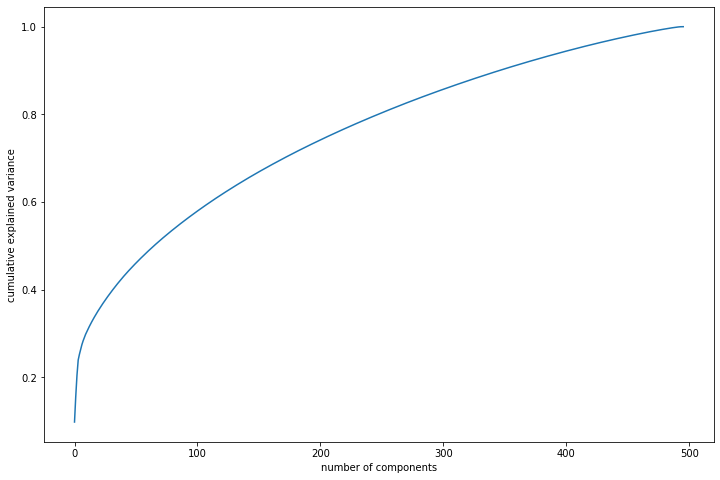

In [42]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [43]:
from sklearn.decomposition import IncrementalPCA

#Try with 350 components that explains almost 90% of the variance.
pca_final = IncrementalPCA(n_components=350)
df_pca = pca_final.fit_transform(X)
df_pca.shape

(28849, 350)

In [44]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,-0.372388,-0.078191,0.175370,0.304912,0.186500,-0.052198,-0.017543,-0.174679,0.026457,0.038287,...,-0.011518,0.028415,0.108799,0.016383,0.054243,0.075208,0.079490,0.002443,-0.036587,0.044544
1,-0.381990,-0.101580,0.187883,-0.128803,-0.093185,-0.239306,0.091721,-0.108533,-0.023983,0.010732,...,0.004743,-0.006409,-0.025359,-0.024879,0.020534,-0.048917,-0.037988,0.012237,-0.012765,-0.005515
2,-0.394706,0.138572,0.144338,-0.274758,0.292153,-0.072431,0.014930,-0.083756,-0.002546,0.024799,...,-0.020642,0.053932,-0.062512,0.034447,-0.004751,-0.005195,0.005063,-0.053734,-0.004426,-0.007339
3,-0.378263,-0.119826,0.139785,0.085707,-0.085344,-0.232177,0.031155,-0.116802,-0.028142,0.015448,...,0.084713,0.085254,-0.009661,0.001636,-0.008168,-0.035233,-0.032112,-0.037752,0.002171,0.049081
4,-0.373643,-0.131994,0.080897,0.339456,0.087260,-0.112641,-0.029130,0.092575,-0.040211,-0.246042,...,-0.016272,-0.033636,0.043547,0.042663,0.001005,0.021919,-0.014705,-0.035316,-0.013558,0.042636


### Random Forest model after PCA with 70:30 train test ratio

In [45]:
X = df_pca
y = df_body_copy['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train, y_train))
print('Training Accuracy:', rf.score(X_train, y_train))
print('testing Accuracy:', rf.score(X_test, y_test))

CV Score: [0.95444417 0.95196831 0.94949245 0.95122555 0.95368995]
Training Accuracy: 1.0
testing Accuracy: 0.9540150202195263


In [ ]:
#Observation:
#There is no change in the training accuracy of Random forest model even after performing PCA.